# Histograms

A histogram is used to plot the distribution of a numeric variable.\
It's the quantitative version of the bar chart. 
However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number.

You can use either `Matplotlib` or `Seaborn` to plot the histograms.\
**Important Note:** There is a mild variation in the specifics, such as plotting _gaussian-estimation line_ along with bars in Seabron's `distplot()`, and the arguments that you can use in either case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
pokemon = pd.read_csv('Files/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


# Histogram Plots With matplotlib.pyplot
The use of `plt.hist()` is similar to `sb.countplot()` as we give the function the data DataFrame, and specifie a column (attribute) to plot the counts of it.

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

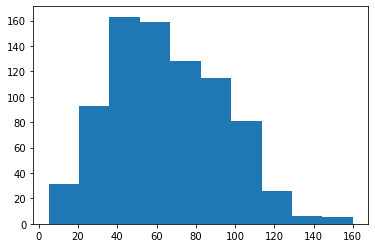

In [4]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data = pokemon, x = 'speed')

By default, the `hist` function divides the data into **10 bins**, based on the range of values taken.\
We can increase/decrease the bins number by the argument `bins = integer` in the hist function.
<img src="Images/Histogram_Understand-1.png"></img>

Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data.

And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.


(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

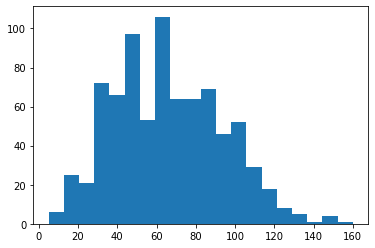

In [5]:
plt.hist(data = pokemon, x = 'speed', bins=20)

### Histogram With Dynamic Number of Bins
Additionally to specifiying the number of bins, we could determine the size of each bin to fit the data and sperate it.

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <BarContainer object of 32 artists>)

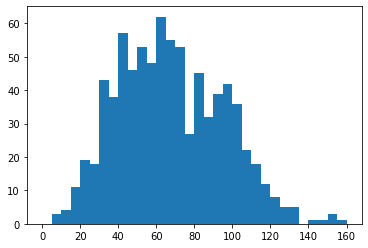

In [7]:
# Create bins with step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)

plt.hist(data = pokemon, x = 'speed', bins = bins)

The first argument to arange is `the leftmost bin edge`, the second argument `the upper limit`, and the third argument `the bin width`.

Note that even though I've specified the "max" value in the second argument, I've added a "+5" (the bin width).\
That is because arange will only return values that are strictly less than the upper limit.\
Adding in "+5" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted.

The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's `around` if you wanted to approach that end programmatically.

# Histogram Plots With seaborn.displot()

This function can also plot histograms, as similar to the `pyplot.hist()` function, and **is integrated** with other univariate plotting functions.

**What do you mean by "is integerated"?**
>This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, >including subsets of data defined by semantic mapping and faceting across multiple subplots. The kind parameter selects the >approach to use:
>* **histplot()** (with kind="hist"; the default)
>* **kdeplot()** (with kind="kde")
>* **ecdfplot()** (with kind="ecdf"; univariate-only)
>
> Source: https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

This is **in contrast** to our ability to specify a data source and column as separate arguments, like we've seen with and `countplot` and `hist`.

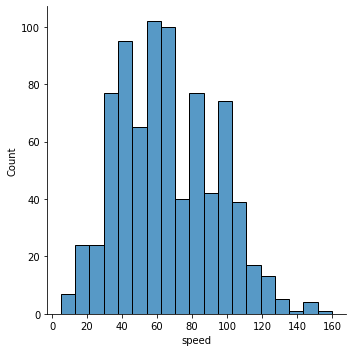

In [10]:
sb.displot(pokemon['speed'])

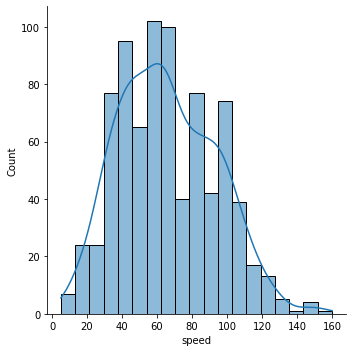

In [11]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.displot(pokemon['speed'], kde=True)

The `displot` function has built-in rules for specifying histogram bins, and a curve depicting the kernel density estimate (KDE) on top of the data. (The curve is inappled through `kde=True`)

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that `.hist` uses, you'll still want to do some tweaking to align the bins to 'round' values.

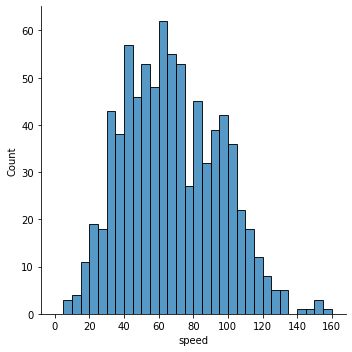

In [15]:
bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
sb.displot(pokemon['speed'], bins = bin_edges, kde = False)

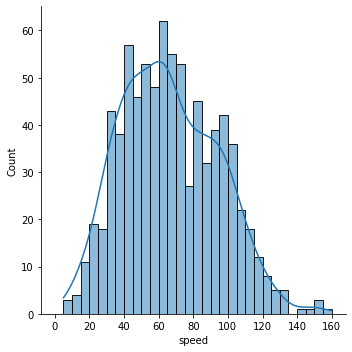

In [16]:
sb.displot(pokemon['speed'], bins = bin_edges, kde = True)

# Plot Two Histograms Side-by-Side

When creating histograms, it's useful to play around with different bin widths to see what represents the data best.
* Too many bins, and you may see too much noise that interferes with the identification of the underlying signal.
* Too few bins, and you may not be able to see the true signal in the first place.

Let's see a new example demonstrating a few new functions, `pyplot.subplot()` and `pyplot.figure()`.\
We will learn more in the upcoming concepts.

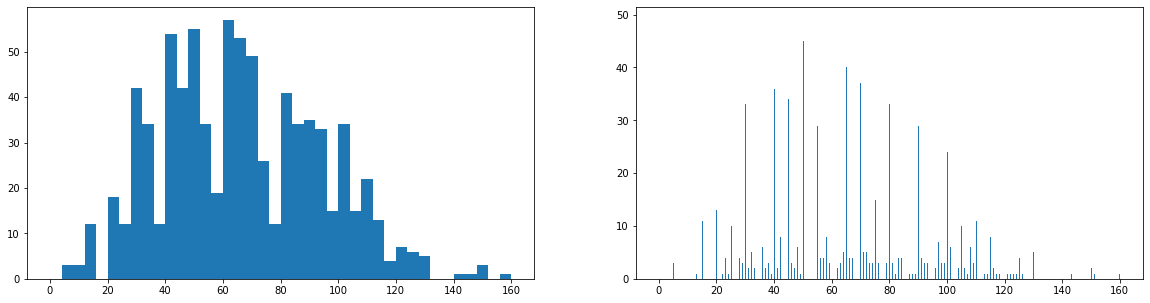

In [17]:
# Resize the chart, and have two plots side-by-side

# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

This example puts two plots side by side through use of the subplot function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order).

The `figure()` function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots.

**(More details on figures and subplots are coming up next in the lesson.)**